In [60]:
import sys

import matplotlib.pyplot as plt
import missingno as msno
import numpy as np
import pandas as pd

print('python:'.ljust(16), sys.version.split('\n')[0])

python:          3.8.9 (default, Apr 13 2022, 08:48:06) 


## Define constants

In [61]:
DATA_PATH = './data/'

TARGET = 'is_bad'  # Target feature
TRAIN = 'TRAIN'  # Binary feature to separate train and valid data

## Load data

In [62]:
# Load datasets
df_train = pd.read_csv(DATA_PATH + 'train.csv', parse_dates=['datetime_submitted'])
df_valid = pd.read_csv(DATA_PATH + 'val.csv', parse_dates=['datetime_submitted'])

# Join train and valid datasets
df_train[TRAIN] = True  # Train/valid flag
df_valid[TRAIN] = False  # Train/valid flag
df = pd.concat([df_train, df_valid], ignore_index=True)

del df_train
del df_valid

## View df general info

In [64]:
df

,title,description,subcategory,category,price,region,city,datetime_submitted,is_bad,TRAIN
0,Диван-кровать,Продаем диван-кровать. Удобный механизм - евро...,Мебель и интерьер,Для дома и дачи,7000.0,Россия,Москва,2019-06-01 00:00:15.180656,0,True
1,Кожух рулевой колонки Даф хф 91 4509834,Кожух рулевой колонки DAF XF 94 (60066004)/\n ...,Запчасти и аксессуары,Транспорт,2290.0,Россия,Москва,2019-06-01 00:00:44.317933,0,True
2,Дешёвый буст аккаунтов Dota 4,! Буст аккаунтов с ммр выше 1000ммр не беру ! ...,Предложение услуг,Услуги,200.0,Северная Осетия,Владикавказ,2019-06-01 00:00:50.249692,1,True
3,Телевизор sharp.Смарт тв.Интернет,Продам телевизор . Диагональ 450.наличие входа...,Аудио и видео,Бытовая электроника,25000.0,Калининградская область,Советск,2019-06-01 00:00:50.325799,1,True
4,Открытка-конверт,Открытки-конверты ручной работы/\nВыполнены в ...,Коллекционирование,Хобби и отдых,150.0,Ставропольский край,Ессентукская,2019-06-01 00:00:56.632655,0,True
...,...,...,...,...,...,...,...,...,...,...
1000719,Офисное помещение,Сдаются офисное помещение по Ул Калинина 80. П...,Коммерческая недвижимость,Недвижимость,9200.0,Чувашия,Чебоксары,2019-10-14 23:57:30.094904,0,False
1000720,iPhone 8 Plus Silver 25GB,Оригинальный ростест айфон. Идеальное состояни...,Телефоны,Бытовая электроника,20000.0,Татарстан,Казань,2019-10-14 23:57:50.610616,0,False
1000721,"6-к квартира, 54 м², 5/9 эт.",______________________________________________...,Квартиры,Недвижимость,3300000.0,Ставропольский край,Пятигорск,2019-10-14 23:58:02.781579,0,False
1000722,"4-к квартира, 60 м², 9/9 эт.",/\n /\n● Работаем БЕЗ ПЕРЕРЫВОВ И ВЫХОДНЫХ с ...,Квартиры,Недвижимость,2300000.0,Ставропольский край,Пятигорск,2019-10-14 23:59:01.435691,0,False


In [65]:
df.loc[df[TRAIN]].info()
print()
df.loc[~df[TRAIN]].info()
print()
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 984487 entries, 0 to 984486
Data columns (total 10 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   title               984487 non-null  object        
 1   description         984487 non-null  object        
 2   subcategory         984487 non-null  object        
 3   category            984487 non-null  object        
 4   price               926439 non-null  float64       
 5   region              984487 non-null  object        
 6   city                984487 non-null  object        
 7   datetime_submitted  984487 non-null  datetime64[ns]
 8   is_bad              984487 non-null  int64         
 9   TRAIN               984487 non-null  bool          
dtypes: bool(1), datetime64[ns](1), float64(1), int64(1), object(6)
memory usage: 76.0+ MB

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16237 entries, 984487 to 1000723
Data columns (total 10 columns

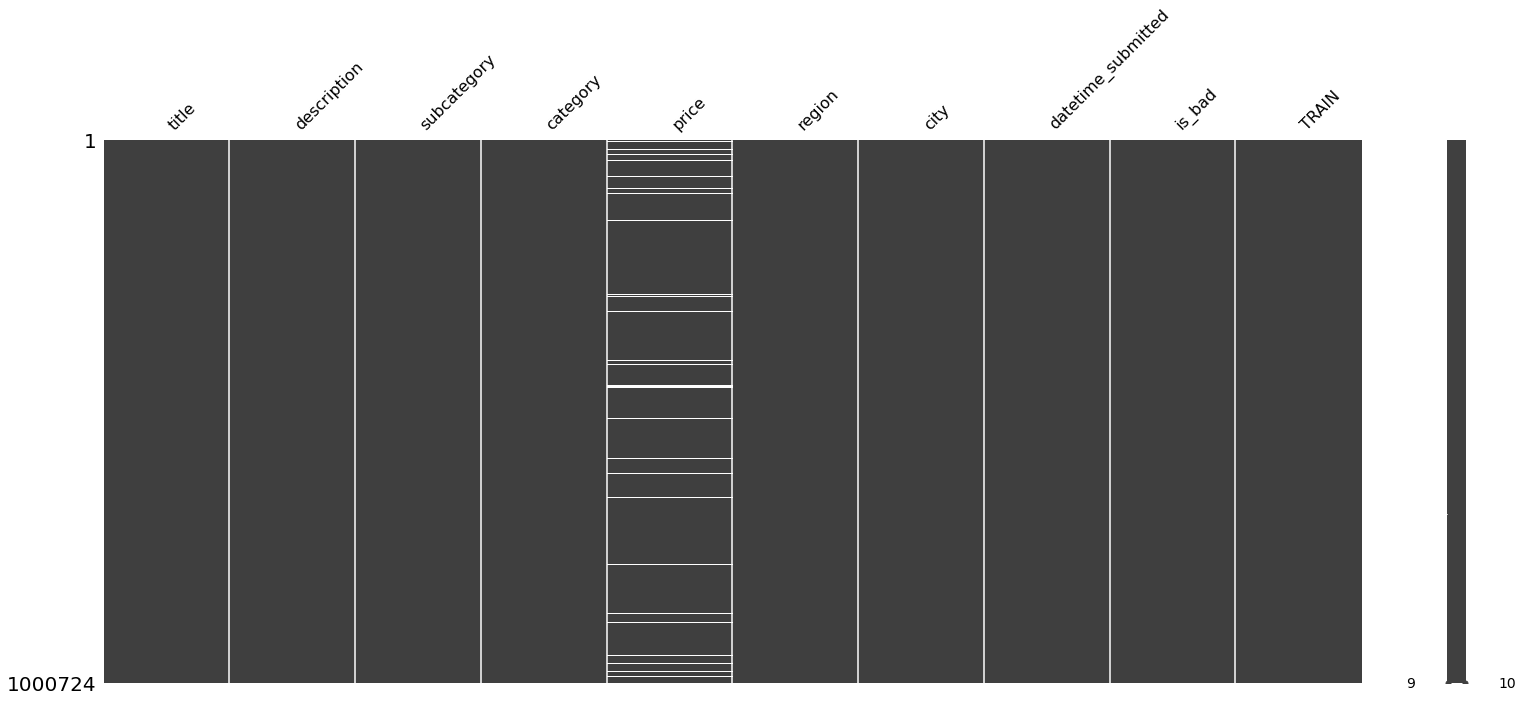

In [66]:
msno.matrix(df);

## View historgams

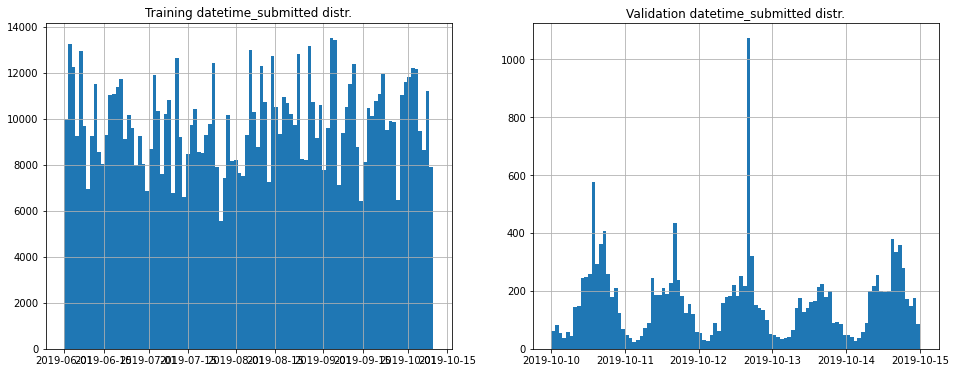

In [67]:
fig, axes = plt.subplots(figsize=(16, 6), nrows=1, ncols=2)
df.loc[df[TRAIN], 'datetime_submitted'].hist(bins=100, ax=axes[0])
df.loc[~df[TRAIN], 'datetime_submitted'].hist(bins=100, ax=axes[1])
axes[0].set_title('Training datetime_submitted distr.')
axes[1].set_title('Validation datetime_submitted distr.')
plt.show()

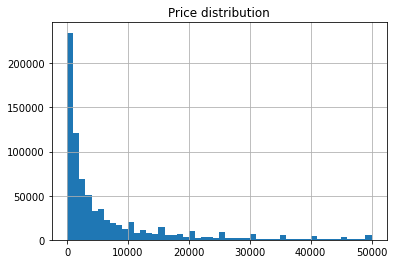

In [74]:
df.loc[df['price'] <= 50000, 'price'].hist(bins=50)
plt.title('Price distribution');

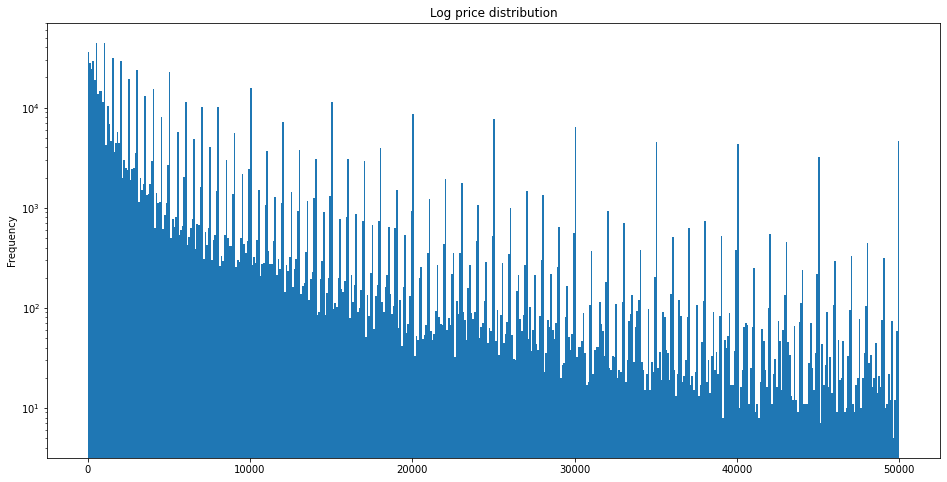

In [75]:
bins = 500
df.loc[df['price'] <= bins*100, 'price'].plot(kind='hist', bins=bins, logy=True, figsize=(16,8))
plt.title('Log price distribution');

## View category distribution

Number of unique         : 2
Number of unique in TRAIN: 2


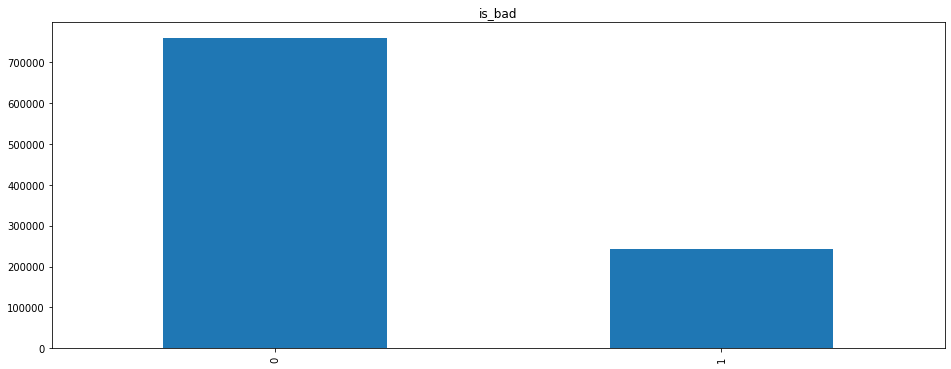


Number of unique         : 10
Number of unique in TRAIN: 10


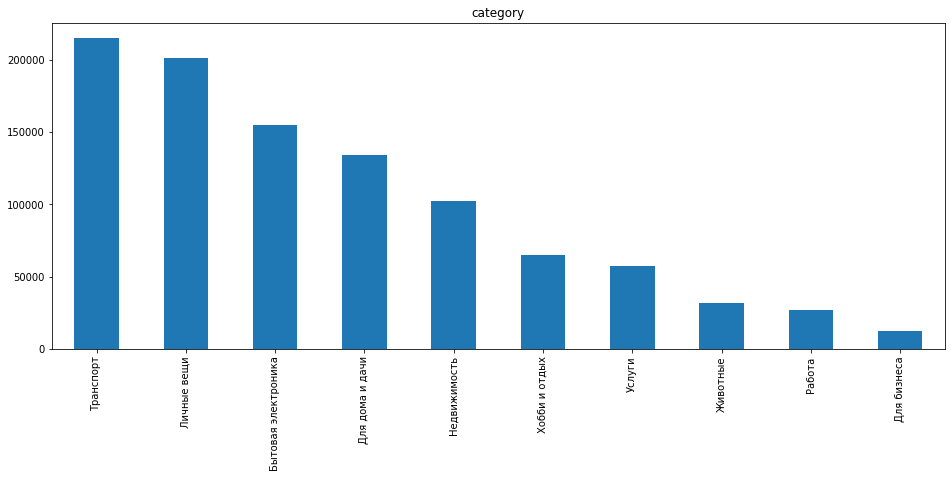


Number of unique         : 50
Number of unique in TRAIN: 50


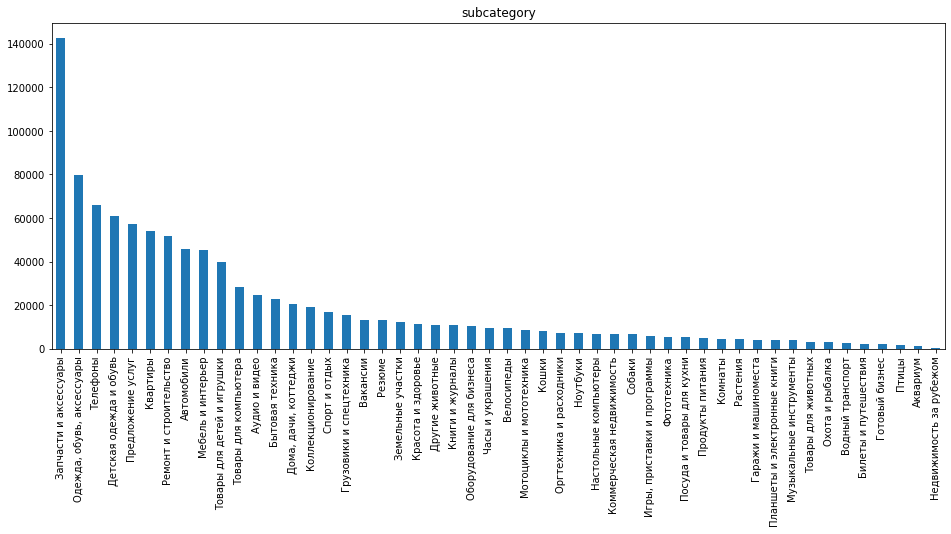


Number of unique         : 85
Number of unique in TRAIN: 85


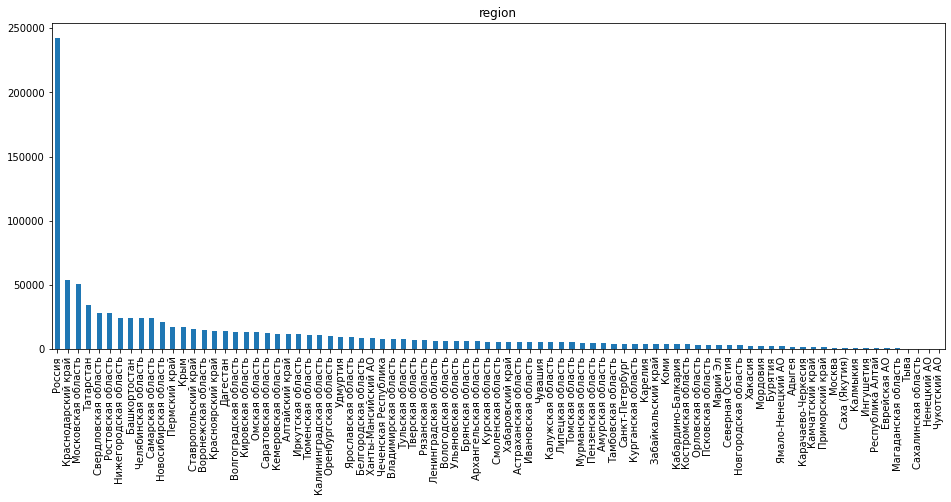


Number of unique         : 3311
Number of unique in TRAIN: 3311


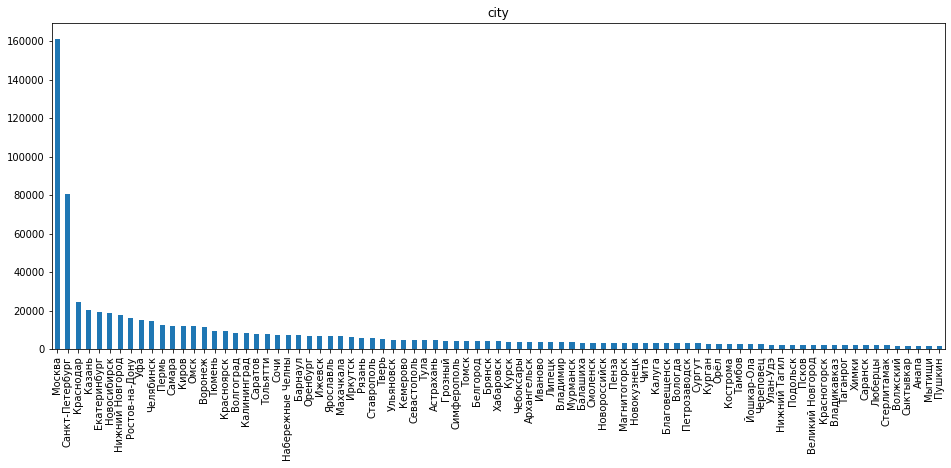

In [70]:
for column in ['is_bad', 'category', 'subcategory', 'region', 'city']:
    print('Number of unique         :', df[column].unique().shape[0])
    print('Number of unique in TRAIN:', df.loc[df[TRAIN], column].unique().shape[0])
    df[column].value_counts().iloc[:85].plot.bar(figsize=(16, 6), title=column)
    plt.show()
    print()